In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image = np.empty((1376,960), np.uint16)

In [3]:
image.data[:] = open('C:\\Users\\Lab N04\\Desktop\\SI_Astronomy\\14-Dec-20\\DSC00088.ARW').read()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 4558: character maps to <undefined>

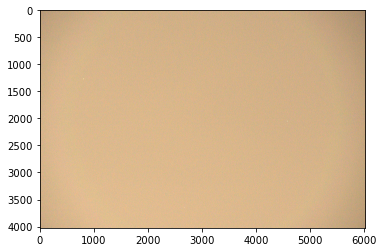

In [2]:
import rawpy
import imageio

raw = rawpy.imread('C:\\Users\\Lab N04\\Desktop\\SI_Astronomy\\01-Jan-21\\DSC00143.ARW')
rgb = raw.postprocess()
# imageio.imsave('default.tiff', rgb)
rbg = rgb.copy()
# rbg[:,:,1] = rgb[:,:,2]
# rbg[:,:,2] = rgb[:,:,1]
plt.imshow(rbg)

In [12]:
print(rgb.shape)

(4024, 6024, 3)


In [3]:
five = [129,131,136,140,143,146]
thirty = [130,132,135,141,142,145]

In [8]:
def sos(array):
    sum = 0
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            for k in range(3):
                sum += array[i][j][k].item()
    return sum

sos_5 = []
sos_30 = []
for i in range(len(five)-1):
#     for j in range(i, len(five)):
    raw = rawpy.imread(f'C:\\Users\\Lab N04\\Desktop\\SI_Astronomy\\01-Jan-21\\DSC00{five[i]}.ARW')
    s5_1 = raw.postprocess()
    raw = rawpy.imread(f'C:\\Users\\Lab N04\\Desktop\\SI_Astronomy\\01-Jan-21\\DSC00{five[i+1]}.ARW')
    s5_2 = raw.postprocess()
    raw = rawpy.imread(f'C:\\Users\\Lab N04\\Desktop\\SI_Astronomy\\01-Jan-21\\DSC00{thirty[i]}.ARW')
    s30_1 = raw.postprocess()
    raw = rawpy.imread(f'C:\\Users\\Lab N04\\Desktop\\SI_Astronomy\\01-Jan-21\\DSC00{thirty[i+1]}.ARW')
    s30_2 = raw.postprocess()
    delta_5 = s5_2-s5_1
    delta_30 = s30_2-s30_1
    sos_5.append(sos(delta_5))
    sos_30.append(sos(delta_30))


In [9]:
print(sos_5)
print(sos_30)

[9656587988, 8094965430, 8569016375, 10487521197, 12178085474]
[10114994619, 7910187901, 9133563715, 9894472532, 11396090465]


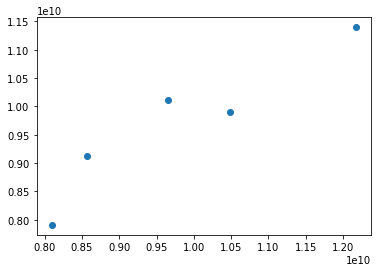

In [10]:
plt.scatter(sos_5, sos_30)

0 1
0 2
0 3
0 4
0 5
1 2
1 3
1 4
1 5
2 3
2 4
2 5
3 4
3 5
4 5


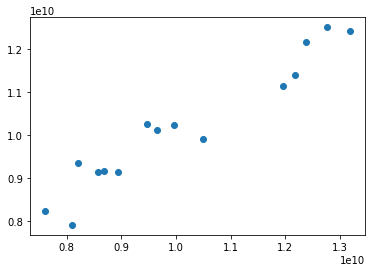

In [14]:
sos_5 = []
sos_30 = []
for i in range(len(five)-1):
    for j in range(i+1, len(five)):
        raw = rawpy.imread(f'C:\\Users\\Lab N04\\Desktop\\SI_Astronomy\\01-Jan-21\\DSC00{five[i]}.ARW')
        s5_1 = raw.postprocess()
        raw = rawpy.imread(f'C:\\Users\\Lab N04\\Desktop\\SI_Astronomy\\01-Jan-21\\DSC00{five[j]}.ARW')
        s5_2 = raw.postprocess()
        raw = rawpy.imread(f'C:\\Users\\Lab N04\\Desktop\\SI_Astronomy\\01-Jan-21\\DSC00{thirty[i]}.ARW')
        s30_1 = raw.postprocess()
        raw = rawpy.imread(f'C:\\Users\\Lab N04\\Desktop\\SI_Astronomy\\01-Jan-21\\DSC00{thirty[j]}.ARW')
        s30_2 = raw.postprocess()
        delta_5 = s5_2-s5_1
        delta_30 = s30_2-s30_1
        sos_5.append(sos(delta_5))
        sos_30.append(sos(delta_30))
        print(i,j)

plt.scatter(sos_5, sos_30)

In [15]:
print(sos_5)
print(sos_30)

[9656587988, 8680748938, 8201222849, 9475610990, 12369759696, 8094965430, 7612082925, 8941411226, 11964764156, 8569016375, 9967134692, 12765837382, 10487521197, 13178720015, 12178085474]
[10114994619, 9158132536, 9346070907, 10240826063, 12147466288, 7910187901, 8240010944, 9143451668, 11126764917, 9133563715, 10222527127, 12497212920, 9894472532, 12402177717, 11396090465]


In [16]:
import numpy as np

In [33]:
x = []
y = []
m ,b = np.polyfit(sos_5, sos_30,1)

for i in range(len(sos_5)):
    x.append(sos_5[i])    
    y.append(sos_5[i]*m+b)

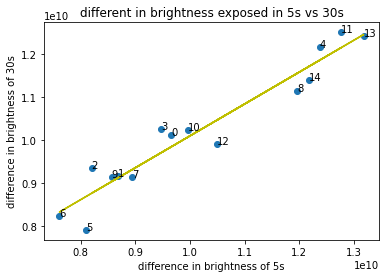

In [41]:
plt.plot(x, y, c='y')
plt.scatter(sos_5, sos_30)
plt.title('different in brightness exposed in 5s vs 30s')
plt.xlabel("difference in brightness of 5s")
plt.ylabel("difference in brightness of 30s")
for i in range(len(sos_5)):
    plt.annotate(i, (sos_5[i],sos_30[i]))
plt.show()